# Capstone: Education and Unemployment in Counties in the USA

Capstone Proposal: https://github.com/JaredBarnes6/Capstone2Project/blob/main/Capstone%202%20Project%20Proposal.pdf

### Problem Question: What is the relationship between unemployment status and education level, given a person's region in the US?

From 2000 to 2019, how has the influence of education on unemployment changed? Are unemployed people more likely to have a high school education, college education, or neither? Are these influences the same for all types of county urban classifications (i.e. cities, suburbs, towns, and rural areas)? 
Can a predictive model be constructed to determine the unemployment status of a person, given their region and education level?


## 1. Importing Data

### 1.1 Imports

In [2]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

#from library.sb_utils import save_file

### 1.2 Importing Education Data, Urban Identification Codes Data, and Unemployment Data

In [3]:
file1 = 'C:/Users/jared/OneDrive/Desktop/CapstoneTwo/Capstone2Project/education.xlsx'
file2 = 'C:/Users/jared/OneDrive/Desktop/CapstoneTwo/Capstone2Project/UIC_codes.csv'
file3 = 'C:/Users/jared/OneDrive/Desktop/CapstoneTwo/Capstone2Project/unemployment.csv'

educ_data = pd.read_excel(file1)
uic_data = pd.read_csv(file2)
unem_data = pd.read_csv(file3)

In [4]:
educ_data.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,"Less than a high school diploma, 1970","High school diploma only, 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1007,AL,Bibb County,1.0,1.0,1.0,1.0,City,5272.0,1402.0,...,20.4,7.1,3386.0,7256.0,3848.0,1678.0,20.9,44.9,23.8,10.4
1,1009,AL,Blount County,1.0,1.0,1.0,1.0,City,10677.0,3440.0,...,24.8,9.6,7763.0,13299.0,13519.0,5210.0,19.5,33.4,34.0,13.1
2,1021,AL,Chilton County,1.0,1.0,1.0,1.0,City,10285.0,2805.0,...,20.5,9.9,5474.0,13348.0,7401.0,3823.0,18.2,44.4,24.6,12.7
3,1073,AL,Jefferson County,1.0,1.0,1.0,1.0,City,186882.0,101656.0,...,28.4,24.6,44684.0,118636.0,136299.0,150124.0,9.9,26.4,30.3,33.4
4,1115,AL,St. Clair County,1.0,1.0,1.0,1.0,City,10304.0,3540.0,...,25.6,11.1,9488.0,21849.0,20207.0,9880.0,15.4,35.6,32.9,16.1


In [5]:
uic_data.head()

,FIPS,State,County_Name,Population_2010,UIC_2013,Description,City/Suburb/Town/Rural
0,1007,AL,Bibb County,"22,915",1,Large-in a metro area with at least 1 million ...,City
1,1009,AL,Blount County,"57,322",1,Large-in a metro area with at least 1 million ...,City
2,1021,AL,Chilton County,"43,643",1,Large-in a metro area with at least 1 million ...,City
3,1073,AL,Jefferson County,"658,466",1,Large-in a metro area with at least 1 million ...,City
4,1115,AL,St. Clair County,"83,593",1,Large-in a metro area with at least 1 million ...,City


In [6]:
unem_data.head()

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,"Bibb County, AL",1.0,1.0,City,1.0,"8,623","8,160",463,...,"8,639","8,371",268,3.1,"8,640","8,067",573,6.6,"47,918",92.6
1,1009,AL,"Blount County, AL",1.0,1.0,City,1.0,"25,266","24,375",891,...,"25,196","24,516",680,2.7,"24,661","23,653","1,008",4.1,"52,902",102.2
2,1021,AL,"Chilton County, AL",1.0,1.0,City,1.0,"19,601","18,752",849,...,"19,841","19,296",545,2.7,"19,592","18,618",974,5.0,"49,692",96.0
3,1073,AL,"Jefferson County, AL",1.0,1.0,City,1.0,"331,141","317,868","13,273",...,"316,802","307,648","9,154",2.9,"315,957","296,282","19,675",6.2,"54,127",104.6
4,1115,AL,"St. Clair County, AL",1.0,1.0,City,1.0,"31,555","30,359","1,196",...,"40,698","39,591","1,107",2.7,"40,132","38,146","1,986",4.9,"65,403",126.3


## 2. Wrangling Data

### 2.1 Check the info in each data frame using .info()

In [7]:
educ_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 48 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   FIPS Code                                                                 3283 non-null   int64  
 1   State                                                                     3283 non-null   object 
 2   Area name                                                                 3283 non-null   object 
 3   2003 Rural-urban Continuum Code                                           3221 non-null   float64
 4   2003 Urban Influence Code                                                 3221 non-null   float64
 5   2013 Rural-urban Continuum Code                                           3221 non-null   float64
 6   2013 Urban Influence Code                                       

In [8]:
uic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   FIPS                    3221 non-null   int64 
 1   State                   3221 non-null   object
 2   County_Name             3221 non-null   object
 3   Population_2010         3221 non-null   object
 4   UIC_2013                3221 non-null   int64 
 5   Description             3221 non-null   object
 6   City/Suburb/Town/Rural  3221 non-null   object
dtypes: int64(2), object(5)
memory usage: 176.3+ KB


In [9]:
unem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 93 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   FIPS_Code                                  3275 non-null   int64  
 1   State                                      3275 non-null   object 
 2   Area_name                                  3275 non-null   object 
 3   Rural_urban_continuum_code_2013            3219 non-null   float64
 4   Urban_influence_code_2013                  3219 non-null   float64
 5   City/Suburb/Town/Rural                     3219 non-null   object 
 6   Metro_2013                                 3222 non-null   float64
 7   Civilian_labor_force_2000                  3270 non-null   object 
 8   Employed_2000                              3270 non-null   object 
 9   Unemployed_2000                            3270 non-null   object 
 10  Unemployment_rate_2000  

### 2.2 Number of missing values by column

Count the number of null values in each column of "educ_data" data frame. Calculate what percentage of each column is null values. Store both features in "missing_educ" data frame.

In [10]:
missing_educ = pd.concat([educ_data.isnull().sum(), 100 * educ_data.isnull().mean()], axis=1)

missing_educ.columns=["count","%"]

missing_educ.sort_values(by=['count','%'])

,count,%
FIPS Code,0,0.000000
State,0,0.000000
Area name,0,0.000000
"Less than a high school diploma, 2015-19",10,0.304599
"High school diploma only, 2015-19",10,0.304599
"Some college or associate's degree, 2015-19",10,0.304599
"Bachelor's degree or higher, 2015-19",10,0.304599
"Percent of adults with less than a high school diploma, 2015-19",10,0.304599
"Percent of adults with a high school diploma only, 2015-19",10,0.304599
"Percent of adults completing some college or associate's degree, 2015-19",10,0.304599


Summary: There are 97 missing values in the data from 1970, accounting for 2.95% of the total data from 1970; 
    62 null values for UIC data - 1.88%; 16 null values for 1980 data - 0.49%; 
    12 missing values (13 for one column) for 1990 data - 0.37% (0.4% for other column); 11 missing for 2000 data - 0.34%; 
    10 missing for 2015-2019 data- 0.3%; none missing for FIPS Code, State, and Area name data.
    All percentages are under 3% null values.

In [11]:
# Calculate what average percentage of all "educ_data" columns is made up of null values. 
educ_data.isnull().mean().sum()/len(educ_data.columns)*100

0.9385470606152907

Count the number of null values in each column of "uic_data" data frame. Calculate what percentage of each column is null values. Store both features in "missing_uic" data frame.

In [12]:
missing_uic = pd.concat([uic_data.isnull().sum(), 100 * uic_data.isnull().mean()], axis=1)

missing_uic.columns=["count","%"]

missing_uic.sort_values(by=['count','%'])

,count,%
FIPS,0,0.0
State,0,0.0
County_Name,0,0.0
Population_2010,0,0.0
UIC_2013,0,0.0
Description,0,0.0
City/Suburb/Town/Rural,0,0.0


In [13]:
#educ_data[educ_data['City/Suburb/Town/Rural 2013']=='Rural'].head(30)
#educ_data.iloc[:,:8].head(30)

Summary: There are no null values. 

In [14]:
# Calculate what average percentage of all "uic_data" columns is made up of null values. 
uic_data.isnull().mean().sum()/len(uic_data.columns)*100

0.0

Count the number of null values in each column of "unem_data" data frame. Calculate what percentage of each column is null values. Store both features in "missing_unem" data frame.

In [15]:
missing_unem = pd.concat([unem_data.isnull().sum(), 100 * unem_data.isnull().mean()], axis=1)

missing_unem.columns=["count","%"]

missing_unem.sort_values(by=['count','%'])

,count,%
FIPS_Code,0,0.000000
State,0,0.000000
Area_name,0,0.000000
Civilian_labor_force_2010,3,0.091603
Employed_2010,3,0.091603
...,...,...
Employed_2020,82,2.503817
Unemployed_2020,82,2.503817
Unemployment_rate_2020,82,2.503817
Median_Household_Income_2019,82,2.503817


In [16]:
# Bar chart of number of missing values.

#plt.bar(unem_data.columns,unem_data.isnull().sum())
#plt.title('unem_data Missing Values')
#plt.xticks(unem_data.columns, rotation='vertical') 
#plt.rcParams["figure.figsize"] = (10, 5)
#plt.show()

Summary: The greatest null value count is 83 from "Med_HH_Income_Percent_of_State_Total_2019" - only 2.53% of the total values. 

In [17]:
# Calculate what average percentage of all "uic_data" columns is made up of null values. 
unem_data.isnull().mean().sum()/len(unem_data.columns)*100

0.3578757284741033

The average percentage of columns made up of null values for all 3 data frames is less than 1%. That greatest percentage being less than 3 percent for columns in all data sets. 

### 2.3 Identifying data types for all columns and converting them appropriately

In [18]:
# Checking the data types for all columns of "educ_data". There are just 3 object type columns, 1 int64 type column, 
# and the rest were float64 types.  
educ_data.dtypes

FIPS Code                                                                     int64
State                                                                        object
Area name                                                                    object
2003 Rural-urban Continuum Code                                             float64
2003 Urban Influence Code                                                   float64
2013 Rural-urban Continuum Code                                             float64
2013 Urban Influence Code                                                   float64
City/Suburb/Town/Rural 2013                                                  object
Less than a high school diploma, 1970                                       float64
High school diploma only, 1970                                              float64
Some college (1-3 years), 1970                                              float64
Four years of college or higher, 1970                                       

In [19]:
# Checking the data types for all columns of "uic_data". There are 5 object type columns and 2 int type columns. The 
# "Population_2010" column should be data type int64 since it is a numeric integer value. 
uic_data.dtypes

FIPS                       int64
State                     object
County_Name               object
Population_2010           object
UIC_2013                   int64
Description               object
City/Suburb/Town/Rural    object
dtype: object

In [20]:
# Convert all values in the 'Population_2010' column from object to int. 
uic_data['Population_2010']=uic_data['Population_2010'].str.replace(',','').astype(int)
uic_data['Population_2010'].dtype

dtype('int32')

It worked. Now the "Population_2010" column is the correct type. 

In [21]:
# Checking the data types for all columns of "unem_data". This is tougher because there are so many columns. 
# Thus, I'll do a count of the columns for each type and see which columns are what type. 
unem_data.dtypes

FIPS_Code                                      int64
State                                         object
Area_name                                     object
Rural_urban_continuum_code_2013              float64
Urban_influence_code_2013                    float64
                                              ...   
Employed_2020                                 object
Unemployed_2020                               object
Unemployment_rate_2020                       float64
Median_Household_Income_2019                  object
Med_HH_Income_Percent_of_State_Total_2019    float64
Length: 93, dtype: object

In [22]:
# There are 25 columns of float types in unem_data.
unem_data.select_dtypes('float')

,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Unemployment_rate_2000,Unemployment_rate_2001,Unemployment_rate_2002,Unemployment_rate_2003,Unemployment_rate_2004,Unemployment_rate_2005,Unemployment_rate_2006,...,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019,Unemployment_rate_2020,Med_HH_Income_Percent_of_State_Total_2019
0,1.0,1.0,1.0,5.4,6.8,7.0,5.9,5.4,4.4,4.2,...,8.8,8.0,7.2,6.7,6.5,4.5,4.0,3.1,6.6,92.6
1,1.0,1.0,1.0,3.5,3.7,5.4,4.6,4.1,3.6,3.2,...,7.1,6.4,6.1,5.4,5.4,4.2,3.5,2.7,4.1,102.2
2,1.0,1.0,1.0,4.3,4.8,5.1,5.0,4.6,3.9,3.6,...,7.4,6.7,6.2,5.7,5.5,4.2,3.6,2.7,5.0,96.0
3,1.0,1.0,1.0,4.0,4.4,5.2,5.5,5.2,4.4,4.0,...,7.6,6.8,6.3,5.8,5.7,4.4,3.7,2.9,6.2,104.6
4,1.0,1.0,1.0,3.8,4.2,5.1,5.2,4.9,3.9,3.5,...,7.0,6.2,5.7,5.2,5.2,4.1,3.5,2.7,4.9,126.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,NaN,NaN,NaN,5.1,6.0,7.1,7.2,6.3,5.6,5.0,...,7.7,6.6,5.9,5.4,5.2,4.6,4.4,4.1,8.4,100.0
3271,NaN,NaN,NaN,5.6,5.4,6.5,6.6,5.8,5.5,5.2,...,7.2,6.7,6.5,6.6,6.1,5.2,5.2,4.9,8.3,100.0
3272,NaN,NaN,NaN,3.4,4.4,5.3,5.6,5.0,4.8,4.7,...,6.9,6.7,5.3,4.4,3.9,3.3,3.0,3.3,6.3,100.0
3273,NaN,NaN,NaN,3.8,3.8,4.0,4.3,3.8,3.6,3.0,...,5.5,4.8,4.3,4.2,5.4,4.3,4.0,3.7,5.8,100.0


In [23]:
# There is 1 columns of int types in unem_data.
unem_data.select_dtypes('int')

,FIPS_Code
0,1007
1,1009
2,1021
3,1073
4,1115
...,...
3270,53000
3271,54000
3272,55000
3273,56000


In [24]:
# There are 67 columns of object types in unem_data. 
unem_data.select_dtypes('object')

,State,Area_name,City/Suburb/Town/Rural,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Civilian_labor_force_2001,Employed_2001,Unemployed_2001,Civilian_labor_force_2002,...,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Median_Household_Income_2019
0,AL,"Bibb County, AL",City,"8,623","8,160",463,"9,134","8,513",621,"8,961",...,"8,569","8,229",340,"8,639","8,371",268,"8,640","8,067",573,"47,918"
1,AL,"Blount County, AL",City,"25,266","24,375",891,"25,450","24,521",929,"25,836",...,"24,960","24,086",874,"25,196","24,516",680,"24,661","23,653","1,008","52,902"
2,AL,"Chilton County, AL",City,"19,601","18,752",849,"19,580","18,631",949,"19,452",...,"19,538","18,834",704,"19,841","19,296",545,"19,592","18,618",974,"49,692"
3,AL,"Jefferson County, AL",City,"331,141","317,868","13,273","327,780","313,445","14,335","323,104",...,"314,427","302,800","11,627","316,802","307,648","9,154","315,957","296,282","19,675","54,127"
4,AL,"St. Clair County, AL",City,"31,555","30,359","1,196","31,855","30,507","1,348","32,033",...,"39,944","38,558","1,386","40,698","39,591","1,107","40,132","38,146","1,986","65,403"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,WA,Washington,NaN,"3,087,680","2,929,824","157,856","3,085,655","2,900,354","185,301","3,101,001",...,"3,811,863","3,645,260","166,603","3,909,319","3,747,162","162,157","3,914,869","3,585,782","329,087","78,674"
3271,WV,West Virginia,NaN,"799,081","754,457","44,624","796,596","753,657","42,939","798,709",...,"793,448","752,244","41,204","798,289","758,989","39,300","792,156","726,023","66,133","48,659"
3272,WI,Wisconsin,NaN,"2,985,643","2,884,737","100,906","3,017,681","2,884,305","133,376","3,016,760",...,"3,106,532","3,012,801","93,731","3,094,325","2,993,025","101,300","3,065,402","2,872,609","192,793","64,177"
3273,WY,Wyoming,NaN,"265,701","255,726","9,975","268,393","258,172","10,221","269,405",...,"294,892","282,956","11,936","296,299","285,292","11,007","296,801","279,462","17,339","66,152"


In [25]:
# There should only be 3 columns of strings (object types): "State", "Area_name", and "City/Suburb/Town/Rural". Thus, 
# the other columns should be converted to float types, as they should. This 'for' loop will remove commas from the string
# values and convert the remaining strings into float types. 

for col in unem_data.select_dtypes('object'):
    if (col not in ['State', 'Area_name', 'City/Suburb/Town/Rural']):
        unem_data[col]=unem_data[col].str.replace(',','').astype(float)

unem_data.select_dtypes('object')

,State,Area_name,City/Suburb/Town/Rural
0,AL,"Bibb County, AL",City
1,AL,"Blount County, AL",City
2,AL,"Chilton County, AL",City
3,AL,"Jefferson County, AL",City
4,AL,"St. Clair County, AL",City
...,...,...,...
3270,WA,Washington,NaN
3271,WV,West Virginia,NaN
3272,WI,Wisconsin,NaN
3273,WY,Wyoming,NaN


In [26]:
# Now check the float types for unem_data again!
unem_data.select_dtypes('float')

,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,Civilian_labor_force_2001,Employed_2001,Unemployed_2001,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1.0,1.0,1.0,8623.0,8160.0,463.0,5.4,9134.0,8513.0,621.0,...,8639.0,8371.0,268.0,3.1,8640.0,8067.0,573.0,6.6,47918.0,92.6
1,1.0,1.0,1.0,25266.0,24375.0,891.0,3.5,25450.0,24521.0,929.0,...,25196.0,24516.0,680.0,2.7,24661.0,23653.0,1008.0,4.1,52902.0,102.2
2,1.0,1.0,1.0,19601.0,18752.0,849.0,4.3,19580.0,18631.0,949.0,...,19841.0,19296.0,545.0,2.7,19592.0,18618.0,974.0,5.0,49692.0,96.0
3,1.0,1.0,1.0,331141.0,317868.0,13273.0,4.0,327780.0,313445.0,14335.0,...,316802.0,307648.0,9154.0,2.9,315957.0,296282.0,19675.0,6.2,54127.0,104.6
4,1.0,1.0,1.0,31555.0,30359.0,1196.0,3.8,31855.0,30507.0,1348.0,...,40698.0,39591.0,1107.0,2.7,40132.0,38146.0,1986.0,4.9,65403.0,126.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,NaN,NaN,NaN,3087680.0,2929824.0,157856.0,5.1,3085655.0,2900354.0,185301.0,...,3909319.0,3747162.0,162157.0,4.1,3914869.0,3585782.0,329087.0,8.4,78674.0,100.0
3271,NaN,NaN,NaN,799081.0,754457.0,44624.0,5.6,796596.0,753657.0,42939.0,...,798289.0,758989.0,39300.0,4.9,792156.0,726023.0,66133.0,8.3,48659.0,100.0
3272,NaN,NaN,NaN,2985643.0,2884737.0,100906.0,3.4,3017681.0,2884305.0,133376.0,...,3094325.0,2993025.0,101300.0,3.3,3065402.0,2872609.0,192793.0,6.3,64177.0,100.0
3273,NaN,NaN,NaN,265701.0,255726.0,9975.0,3.8,268393.0,258172.0,10221.0,...,296299.0,285292.0,11007.0,3.7,296801.0,279462.0,17339.0,5.8,66152.0,100.0


### 2.4 Removing null values

It is important to remove rows that have NaN or null values. Those include rows that don't have a specific county listed (e.g. State: WA, Area_name: Washington), because we don't know the UIC for that area not specified. 

### 2.5 Comparing data from different states

What is the spread on number of counties grouped by state with valid data listed in each dataframe?

Text(0.5, 0, 'Count (unem_data)')

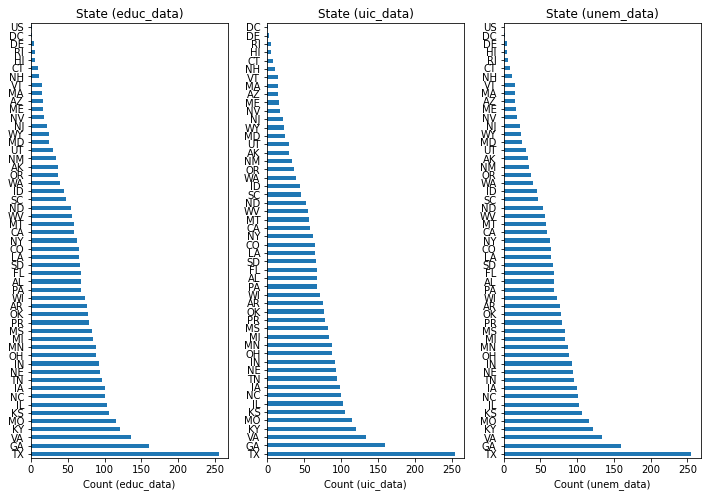

In [27]:
# Plotting the number of counties per state for each data set.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

# Plot for all counties per state in educ_data.
educ_data.State.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('State (educ_data)')
ax[0].set_xlabel('Count (educ_data)')

# Plot for all counties per state in uic_data.
uic_data.State.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('State (uic_data)')
ax[1].set_xlabel('Count (uic_data)')

# Plot for all counties per state in unem_data.
unem_data.State.value_counts().plot(kind='barh', ax=ax[2])
ax[2].set_title('State (unem_data)')
ax[2].set_xlabel('Count (unem_data)')

Each spread of state county data is nearly identical to the other two! Texas with the most counties, down to Delaware with the least.

### 2.6 Merging dataframes into one 

Before merging the 3 datasets - educ_data, uic_data, and unem_data - I must determine which columns are needed from each. I won't include columns that are not necessary. 

#### 2.6.1 Drop appropriate unwanted columns

In [28]:
# First look at the columns of all data sets, choosing which data is necessary.
print(educ_data.columns, 
      uic_data.columns,
      unem_data.columns)


Index(['FIPS Code', 'State', 'Area name', '2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code', 'City/Suburb/Town/Rural 2013',
       'Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 years), 1970',
       'Four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Less than a high school diploma, 1980',
       'High school diploma only, 1980', 'Some college (1-3 years), 1980',
       'Four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adu

Since our analysis is only from 2000 to present, I will not include data before 2000 from educ_data. Also, although educ_data only has data from 2000 and 2015-2019 and unem_data has data from 2000-2020, I will keep all unem_data in case I need to observe trends in unemployment over that 20 year period. I will also keep all uic_data, as it fits within the 20 year period of 2000-2020. 

In [29]:
# Removing data before 2000 from educ_data using drop() and loc().
educ_data_2000_after = educ_data.drop(educ_data.loc[:, "Less than a high school diploma, 1970":"Percent of adults with a bachelor's degree or higher, 1990"].columns, axis = 1)
educ_data_2000_after.columns

Index(['FIPS Code', 'State', 'Area name', '2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code', 'City/Suburb/Town/Rural 2013',
       'Less than a high school diploma, 2000',
       'High school diploma only, 2000',
       'Some college or associate's degree, 2000',
       'Bachelor's degree or higher, 2000',
       'Percent of adults with less than a high school diploma, 2000',
       'Percent of adults with a high school diploma only, 2000',
       'Percent of adults completing some college or associate's degree, 2000',
       'Percent of adults with a bachelor's degree or higher, 2000',
       'Less than a high school diploma, 2015-19',
       'High school diploma only, 2015-19',
       'Some college or associate's degree, 2015-19',
       'Bachelor's degree or higher, 2015-19',
       'Percent of adults with less than a high school diploma, 2015-19',
       'Percent of adults with a high school 

#### 2.6.2 Check identical columns across educ_data_2000_after, uic_data, and unem_data.

In [30]:
educ_data_2000_after.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,"Less than a high school diploma, 2000","High school diploma only, 2000",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1007,AL,Bibb County,1.0,1.0,1.0,1.0,City,4984.0,4838.0,...,20.4,7.1,3386.0,7256.0,3848.0,1678.0,20.9,44.9,23.8,10.4
1,1009,AL,Blount County,1.0,1.0,1.0,1.0,City,9960.0,12136.0,...,24.8,9.6,7763.0,13299.0,13519.0,5210.0,19.5,33.4,34.0,13.1
2,1021,AL,Chilton County,1.0,1.0,1.0,1.0,City,8757.0,9264.0,...,20.5,9.9,5474.0,13348.0,7401.0,3823.0,18.2,44.4,24.6,12.7
3,1073,AL,Jefferson County,1.0,1.0,1.0,1.0,City,82950.0,121233.0,...,28.4,24.6,44684.0,118636.0,136299.0,150124.0,9.9,26.4,30.3,33.4
4,1115,AL,St. Clair County,1.0,1.0,1.0,1.0,City,12353.0,14921.0,...,25.6,11.1,9488.0,21849.0,20207.0,9880.0,15.4,35.6,32.9,16.1


In [31]:
uic_data.head()

,FIPS,State,County_Name,Population_2010,UIC_2013,Description,City/Suburb/Town/Rural
0,1007,AL,Bibb County,22915,1,Large-in a metro area with at least 1 million ...,City
1,1009,AL,Blount County,57322,1,Large-in a metro area with at least 1 million ...,City
2,1021,AL,Chilton County,43643,1,Large-in a metro area with at least 1 million ...,City
3,1073,AL,Jefferson County,658466,1,Large-in a metro area with at least 1 million ...,City
4,1115,AL,St. Clair County,83593,1,Large-in a metro area with at least 1 million ...,City


In [32]:
unem_data.head()

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,"Bibb County, AL",1.0,1.0,City,1.0,8623.0,8160.0,463.0,...,8639.0,8371.0,268.0,3.1,8640.0,8067.0,573.0,6.6,47918.0,92.6
1,1009,AL,"Blount County, AL",1.0,1.0,City,1.0,25266.0,24375.0,891.0,...,25196.0,24516.0,680.0,2.7,24661.0,23653.0,1008.0,4.1,52902.0,102.2
2,1021,AL,"Chilton County, AL",1.0,1.0,City,1.0,19601.0,18752.0,849.0,...,19841.0,19296.0,545.0,2.7,19592.0,18618.0,974.0,5.0,49692.0,96.0
3,1073,AL,"Jefferson County, AL",1.0,1.0,City,1.0,331141.0,317868.0,13273.0,...,316802.0,307648.0,9154.0,2.9,315957.0,296282.0,19675.0,6.2,54127.0,104.6
4,1115,AL,"St. Clair County, AL",1.0,1.0,City,1.0,31555.0,30359.0,1196.0,...,40698.0,39591.0,1107.0,2.7,40132.0,38146.0,1986.0,4.9,65403.0,126.3


The following columns represent data appearing in all three datasets: 'FIPS_Code', 'State', 'Area_name'/'County_Name', 'Urban_influence_code_2013', and 'City/Suburb/Town/Rural'. I have decided to keep only the FIPS_Code in all 3, so I can merge on that column. I will drop the other columns in this list from each data set except for uic_data. uic_data will be the let most dataset appearing in the merge and will contain all of these columns. 

In [33]:
# Drop 'State', 'Area_name'/'County_Name', 'Urban_influence_code_2013', and 'City/Suburb/Town/Rural' columns 
# from educ_data_2000_after and unem_data. Now the only column that identifies each county that is consistant among all
# data sets is the FIPS/FIPS_Code column. That is the column I will merge on. 

educ_data_2000_after_2 = educ_data_2000_after.drop(["State", "Area name","2003 Rural-urban Continuum Code", "2003 Urban Influence Code","2013 Rural-urban Continuum Code","2013 Urban Influence Code", "City/Suburb/Town/Rural 2013"], axis = 1)
unem_data_2 = unem_data.drop(["State","Area_name","Rural_urban_continuum_code_2013","Urban_influence_code_2013", "City/Suburb/Town/Rural","Metro_2013"], axis = 1)

print(educ_data_2000_after_2.columns,
      unem_data_2.columns)

Index(['FIPS Code', 'Less than a high school diploma, 2000',
       'High school diploma only, 2000',
       'Some college or associate's degree, 2000',
       'Bachelor's degree or higher, 2000',
       'Percent of adults with less than a high school diploma, 2000',
       'Percent of adults with a high school diploma only, 2000',
       'Percent of adults completing some college or associate's degree, 2000',
       'Percent of adults with a bachelor's degree or higher, 2000',
       'Less than a high school diploma, 2015-19',
       'High school diploma only, 2015-19',
       'Some college or associate's degree, 2015-19',
       'Bachelor's degree or higher, 2015-19',
       'Percent of adults with less than a high school diploma, 2015-19',
       'Percent of adults with a high school diploma only, 2015-19',
       'Percent of adults completing some college or associate's degree, 2015-19',
       'Percent of adults with a bachelor's degree or higher, 2015-19'],
      dtype='object') 

#### 2.6.3 Merge the 3 data sets: uic_data, educ_data_2000_after_2, and unem_data_2.

In [34]:
# Time to merge uic_data, educ_data_2000_after_2, and unem_data_2 in that order from left to right. 
# Perform 2 merges to merge all 3. Now we see that the data from all 3 appear in the new dataframe called 'data'.

uic_educ_df = pd.merge(uic_data, educ_data_2000_after_2, left_on='FIPS', right_on='FIPS Code').drop('FIPS Code', axis=1)

data = pd.merge(uic_educ_df, unem_data_2, left_on='FIPS', right_on='FIPS_Code').drop('FIPS_Code', axis=1)

data.head()

,FIPS,State,County_Name,Population_2010,UIC_2013,Description,City/Suburb/Town/Rural,"Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000",...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,Bibb County,22915,1,Large-in a metro area with at least 1 million ...,City,4984.0,4838.0,2756.0,...,8639.0,8371.0,268.0,3.1,8640.0,8067.0,573.0,6.6,47918.0,92.6
1,1009,AL,Blount County,57322,1,Large-in a metro area with at least 1 million ...,City,9960.0,12136.0,8371.0,...,25196.0,24516.0,680.0,2.7,24661.0,23653.0,1008.0,4.1,52902.0,102.2
2,1021,AL,Chilton County,43643,1,Large-in a metro area with at least 1 million ...,City,8757.0,9264.0,5307.0,...,19841.0,19296.0,545.0,2.7,19592.0,18618.0,974.0,5.0,49692.0,96.0
3,1073,AL,Jefferson County,658466,1,Large-in a metro area with at least 1 million ...,City,82950.0,121233.0,123142.0,...,316802.0,307648.0,9154.0,2.9,315957.0,296282.0,19675.0,6.2,54127.0,104.6
4,1115,AL,St. Clair County,83593,1,Large-in a metro area with at least 1 million ...,City,12353.0,14921.0,11036.0,...,40698.0,39591.0,1107.0,2.7,40132.0,38146.0,1986.0,4.9,65403.0,126.3


In [35]:
# Checking the missing values of the set. 

#data.isnull

missing_data = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)

missing_data.columns=["count","%"]

missing_data.sort_values(by=['count','%'])

,count,%
FIPS,0,0.000000
State,0,0.000000
County_Name,0,0.000000
Population_2010,0,0.000000
UIC_2013,0,0.000000
...,...,...
Employed_2020,78,2.424619
Unemployed_2020,78,2.424619
Unemployment_rate_2020,78,2.424619
Median_Household_Income_2019,78,2.424619


In [36]:
data_clean = data.dropna()

## 3.  Visualizing the Data

### 3.1  Plotting education averages for all states

In [37]:
state_avgg=data_clean.groupby('State').mean()
state_avgg.head(10)

,FIPS,Population_2010,UIC_2013,"Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000",...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
State,,,,,,,,,,,,,,,,,,,,,
AK,2138.217391,29909.173913,9.739130,1811.565217,4378.260870,5734.347826,3990.826087,16.604348,33.173913,31.100000,...,14953.173913,14168.695652,784.478261,6.713043,14705.782609,13574.782609,1131.000000,8.782609,70142.304348,90.856522
AL,1067.000000,71339.343284,4.388060,10657.925373,13092.776119,11141.716418,8203.104478,30.347761,32.829851,23.322388,...,33392.343284,32379.089552,1013.253731,3.477612,33285.552239,31329.358209,1956.194030,6.283582,46146.447761,89.134328
AR,5075.000000,38878.906667,5.866667,5699.320000,7872.213333,5665.426667,3845.706667,29.036000,36.644000,22.018667,...,18203.626667,17562.173333,641.453333,4.152000,18057.320000,16964.626667,1092.693333,6.293333,44090.360000,89.946667
AZ,4013.866667,426134.466667,3.600000,41303.133333,52793.600000,71901.400000,51080.800000,24.600000,27.666667,31.620000,...,235915.000000,224444.133333,11470.866667,6.640000,238014.600000,219210.000000,18804.600000,8.986667,51517.266667,83.040000
CA,6058.000000,642309.586207,3.362069,85219.706897,73938.827586,110305.844828,97758.034483,21.260345,23.796552,33.362069,...,333685.206897,319836.620690,13848.586207,5.246552,324503.034483,291604.879310,32898.155172,9.717241,71038.379310,88.329310
CO,8063.000000,78941.380952,7.238095,5762.523810,10227.936508,13674.253968,14408.809524,15.315873,27.290476,31.668254,...,48978.571429,47676.111111,1302.460317,2.744444,48920.968254,45363.841270,3557.126984,6.409524,61958.380952,80.352381
CT,9008.000000,446762.125000,1.750000,45957.000000,81662.500000,69208.375000,90124.250000,15.100000,29.950000,25.412500,...,239662.750000,231059.500000,8603.250000,3.487500,234079.000000,215577.875000,18501.125000,7.625000,79180.125000,100.337500
DC,11001.000000,601723.000000,1.000000,85249.000000,79169.000000,69880.000000,150237.000000,22.200000,20.600000,18.200000,...,414976.000000,392726.000000,22250.000000,5.400000,409734.000000,376839.000000,32895.000000,8.000000,90395.000000,100.000000
DE,10003.000000,299311.333333,1.666667,29845.333333,53920.000000,44815.000000,42972.333333,19.533333,32.700000,26.133333,...,162680.000000,156740.000000,5940.000000,3.766667,161453.000000,148819.333333,12633.666667,7.933333,66573.000000,94.633333


In [89]:
# Defining a function that will produce a bar chart of education data vs. each state, 
# averaging data entries across all counties per state, given a certain year.

def state_educ_barplot(educ_data_col):
    
    """Displays a bar plot of the education data (given as educ_data_col) for each state. Also returns the mean, max, and min
    values across all states in the US."""
    
    state_avg_list = []
    for i in data_clean['State'].unique():
        state_avg_list.append(data_clean[data_clean['State']==i][educ_data_col].mean())
    
    dff_plot = pd.DataFrame({"State":data_clean['State'].unique(),
                  educ_data_col:state_avg_list})
    fig, axs = plt.subplots(nrows=1, figsize=(15,5))
    sns.barplot(x='State',
            y=educ_data_col,
            data=dff_plot, 
            order=dff_plot.sort_values(educ_data_col).State).set(title=educ_data_col)
    plt.tight_layout()

    print("Avg " + educ_data_col +":   " + str(np.mean(state_avg_list))) # prints the mean value across all states
    print("Max " + educ_data_col +":   " + str(max(state_avg_list)))     # prints the maximum value across all states
    print("Min " + educ_data_col +":   " + str(min(state_avg_list)))     # prints the minimum value across all states
          

Let us start by calculating the average percent of each state population that has no high school diploma. Then plot those averages for the year 2000 and years 2015-2019, as given in the education data. Then we will observe trends or patterns in the plots, as well as compare the two plots to one another. 

Avg Percent of adults with less than a high school diploma, 2000:   20.636929400695006
Max Percent of adults with less than a high school diploma, 2000:   32.328333333333326
Min Percent of adults with less than a high school diploma, 2000:   12.839130434782609


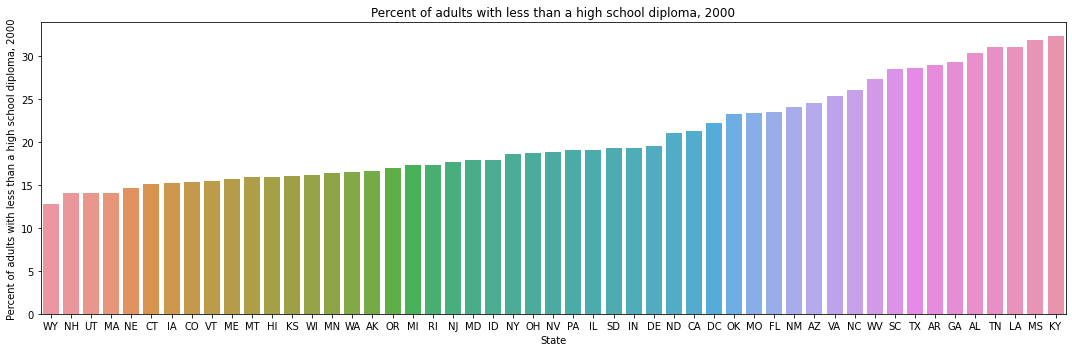

In [80]:
state_educ_barplot("Percent of adults with less than a high school diploma, 2000")

Avg Percent of adults with less than a high school diploma, 2015-19:   11.708703100285291
Max Percent of adults with less than a high school diploma, 2015-19:   19.153543307086615
Min Percent of adults with less than a high school diploma, 2015-19:   7.156521739130435


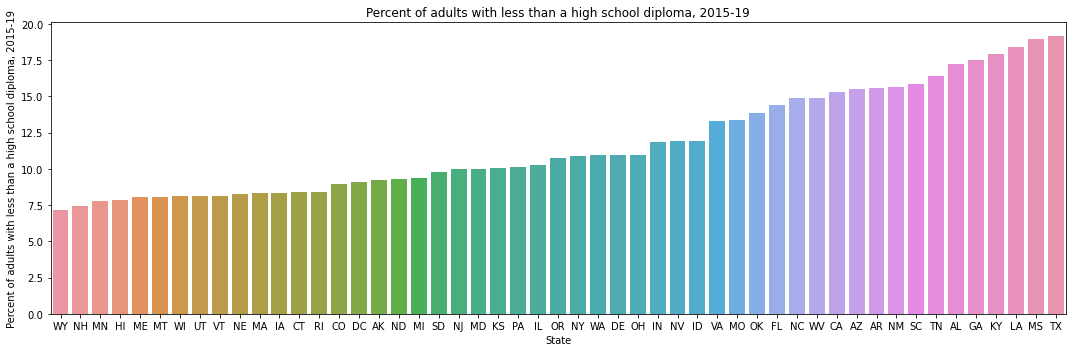

In [81]:
state_educ_barplot("Percent of adults with less than a high school diploma, 2015-19")

In the year 2000: Wyoming showed the lowest percentage of population without a high school diploma. Kentucky showed the highest.

In the years 2015-2019: Wyoming still showed the lowest percentage, while Texas showed the highest. Texas was the 8th highest in percentage in 2000. 

Overall, it is evident that the average percent of state population without a high school diploma is lower in 2015-2019 than in 2000 across the board. The highest percentage in 2000 was above 30% vs. in 2015-2019 the highest percentage was below 20%. The avg percentage in 2000 was about 21%, whereas the avg percentage in 2015-2019 was about 12%.

Next, we'll plot the average percentage of state population that has a high school diploma for year 2000 and years 2015-2019. 

Avg Percent of adults with a high school diploma only, 2000:   33.49201252772574
Max Percent of adults with a high school diploma only, 2000:   44.023880597014916
Min Percent of adults with a high school diploma only, 2000:   20.6


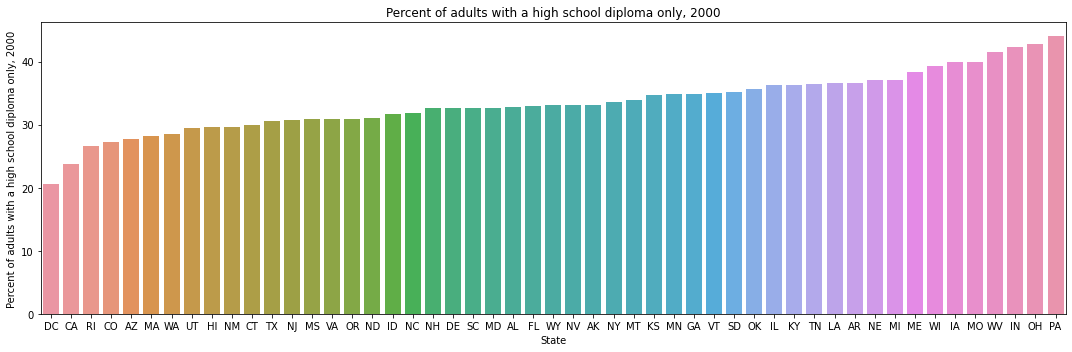

In [82]:
state_educ_barplot("Percent of adults with a high school diploma only, 2000")

Avg Percent of adults with a high school diploma only, 2015-19:   32.60475672111445
Max Percent of adults with a high school diploma only, 2015-19:   44.03272727272728
Min Percent of adults with a high school diploma only, 2015-19:   16.8


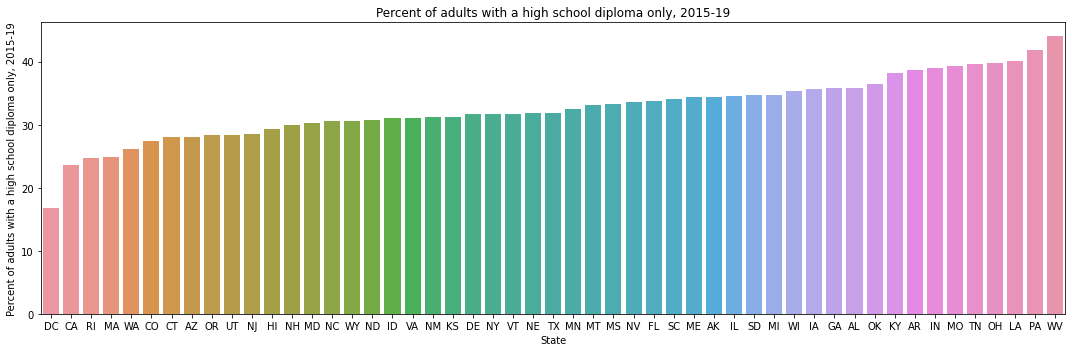

In [83]:
state_educ_barplot("Percent of adults with a high school diploma only, 2015-19")

In year 2000: The state with the highest percentage of population with a high school diploma was Pennsylvania, where the state with the lowest percentage was Washington DC. All states had percentages between 20% and 45%.

In years 2015-2019: The state with the highest percentage of state population with a high school diploma was West Virginia, with Pennsylvania ranking 2nd highest. The state with the lowest percentage is still Washington DC, with an even lower percentage (in 2000, the percentage was nearly 20%, but in 2015-2019 the percentage is closer to 15%).

Overall, both plots have a mean percentage of population with HS diploma between 32.5% and 33.5%, averaged over all states. There has not been a significantly large change since 2000.

Plot the average percentage of state population that has completed some college or associates degree, for year 2000 and years 2015-2019. 

Avg Percent of adults completing some college or associate's degree, 2000:   26.905482296618068
Max Percent of adults completing some college or associate's degree, 2000:   36.33793103448276
Min Percent of adults completing some college or associate's degree, 2000:   18.2


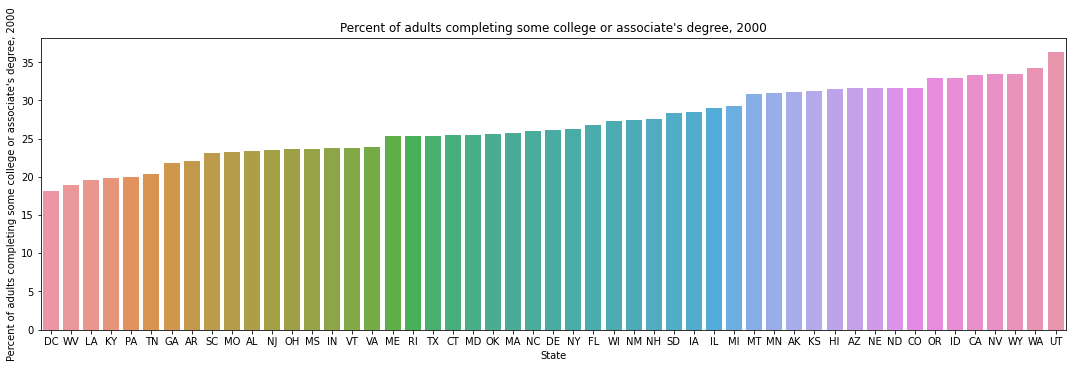

In [84]:
state_educ_barplot("Percent of adults completing some college or associate's degree, 2000")

Avg Percent of adults completing some college or associate's degree, 2015-19:   30.54422891032472
Max Percent of adults completing some college or associate's degree, 2015-19:   37.241379310344826
Min Percent of adults completing some college or associate's degree, 2015-19:   15.5


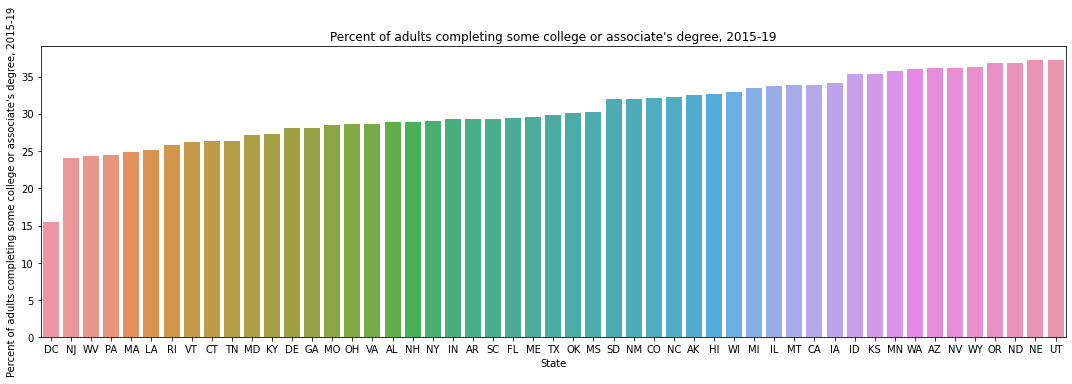

In [85]:
state_educ_barplot("Percent of adults completing some college or associate's degree, 2015-19")

In year 2000: The state with the highest percentage of population with some college or associates was Utah, where the state with the lowest percentage was Washington DC. All states had percentages between 17% and 40%.

In years 2015-2019: The state with the highest percentage of population with some college or associates was still Utah, where the state with the lowest percentage was still Washington DC. However, more states displayed a higher percentage, except Washington DC which showed a lower percentage.

Overall, here are the average percentages of state population with some college or associates education. In year 2000: 26.905482296618068 % In year 2015-2019: 30.54422891032472 % There is a clear rise in average percentage from 2000 to the years 2015-2019.

Plot the average percentage of state population that has completed at least a bachelor's degree, for year 2000 and years 2015-2019.

Avg Percent of adults with a bachelor's degree or higher, 2000:   18.965757381835004
Max Percent of adults with a bachelor's degree or higher, 2000:   39.1
Min Percent of adults with a bachelor's degree or higher, 2000:   11.554166666666667


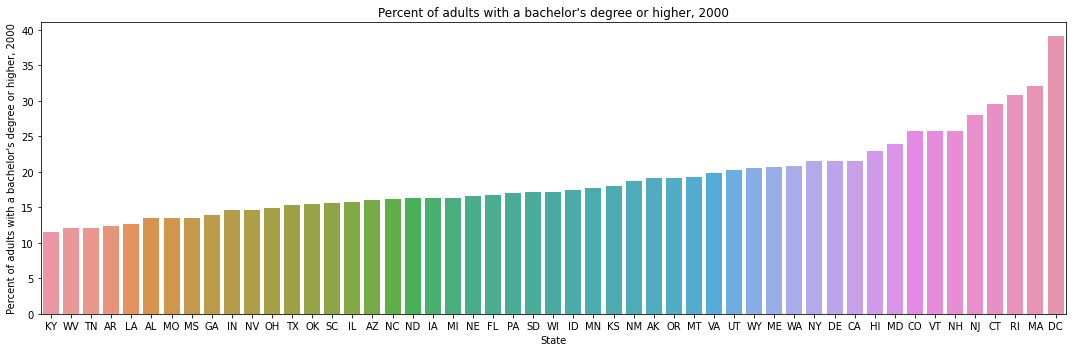

In [86]:
state_educ_barplot("Percent of adults with a bachelor's degree or higher, 2000")

Avg Percent of adults with a bachelor's degree or higher, 2015-19:   25.14309444523532
Max Percent of adults with a bachelor's degree or higher, 2015-19:   58.5
Min Percent of adults with a bachelor's degree or higher, 2015-19:   16.39824561403508


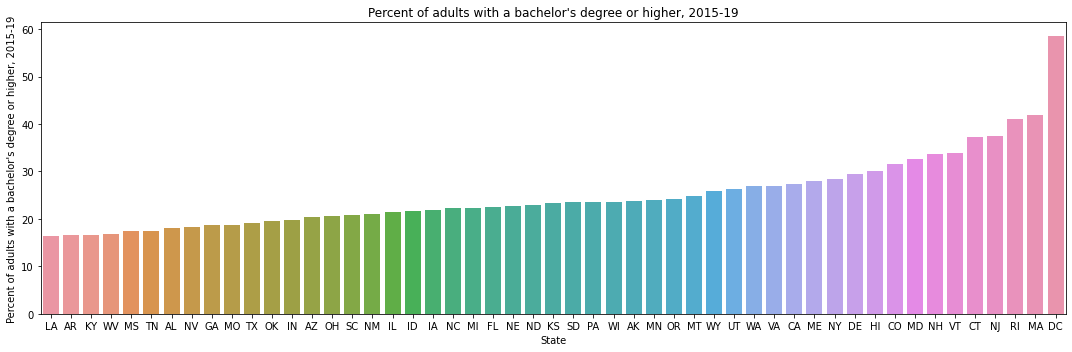

In [87]:
state_educ_barplot("Percent of adults with a bachelor's degree or higher, 2015-19")

In year 2000: The state with the highest percentage of population with at least a bachelor's degree is Washington DC, where the state with the lowest percentage was Kentucky. All states had percentages between 12% and 40%.

In years 2015-2019: The state with the highest percentage of population with at least a bachelor's degree is still Washington DC, with a larger gap between itself and the next state, Maine. The state with the lowest percentage is Louisiana. All states had percentages between 15% and 60%.

Overall, the percent of state population with at least a bachelor's degree increased from about 19% to about 25% in the years spanning 2000 to 2015-2019. Washington DC clearly has the highest percentage compared to all other states in this category.

### 3.2  Plotting unemployment averages for all states

In [122]:
# Defining a function that will produce a bar chart of unemployement data vs. each state, 
# averaging data entries across all counties per state, given a certain year.

def state_unem_barplot(unem_data_col):
    
    """Displays a bar plot of the unemployement data (given as unem_data_col) for each state. Also returns the mean, max, and min
    values across all states in the US."""

    # Averaging data for the years 2015 through 2019.
    Unemployment_rate_2015_to_2019 = ['Unemployment_rate_2015','Unemployment_rate_2016','Unemployment_rate_2017',
                             'Unemployment_rate_2018','Unemployment_rate_2019']
    Unemployment_2015_to_2019 = ['Unemployed_2015','Unemployed_2016','Unemployed_2017','Unemployed_2018','Unemployed_2019']
    
    state_avg_list = []
    
    # The "for" loop will look different depending on if we select the year 2000 or years 2015-2019.
    # This "if" statement filters out the correct "for" loop based on the year. 
    if unem_data_col == "Unemployment_rate_2015_to_2019" or unem_data_col == "Unemployed_2015_to_2019": 
        
        # List of data columns for each year in 2015-2019
        if unem_data_col == "Unemployment_rate_2015_to_2019": unem_data_col_0 = Unemployment_rate_2015_to_2019 
        if unem_data_col == "Unemployed_2015_to_2019": unem_data_col_0 = Unemployment_2015_to_2019 
        
        state_avg_list_0=[]
        for i in data_clean['State'].unique():
            for j in unem_data_col_0:
                state_avg_list_0.append(data_clean[data_clean['State']==i][j].mean())
            state_avg_list.append(np.mean(state_avg_list_0))
    
    else: # If the data is for only one year.
        for i in data_clean['State'].unique():
            state_avg_list.append(data_clean[data_clean['State']==i][unem_data_col].mean())
            
    
    dff_plot = pd.DataFrame({"State":data_clean['State'].unique(),
                  unem_data_col:state_avg_list})
    fig, axs = plt.subplots(nrows=1, figsize=(15,5))
    sns.barplot(x='State',
            y=unem_data_col,
            data=dff_plot, 
            order=dff_plot.sort_values(unem_data_col).State).set(title=unem_data_col)
    plt.tight_layout()

    print("Avg " + unem_data_col +":   " + str(np.mean(state_avg_list))) # prints the mean value across all states
    print("Max " + unem_data_col +":   " + str(max(state_avg_list)))     # prints the maximum value across all states
    print("Min " + unem_data_col +":   " + str(min(state_avg_list)))     # prints the minimum value across all states

Plot the the average rate of unemployment over all counties per state, for year 2000 and years 2015-2019. Then comparing the two plots, as done above with education data.

Avg Unemployment_rate_2000:   4.40212020361501
Max Unemployment_rate_2000:   7.5
Min Unemployment_rate_2000:   2.0374999999999996


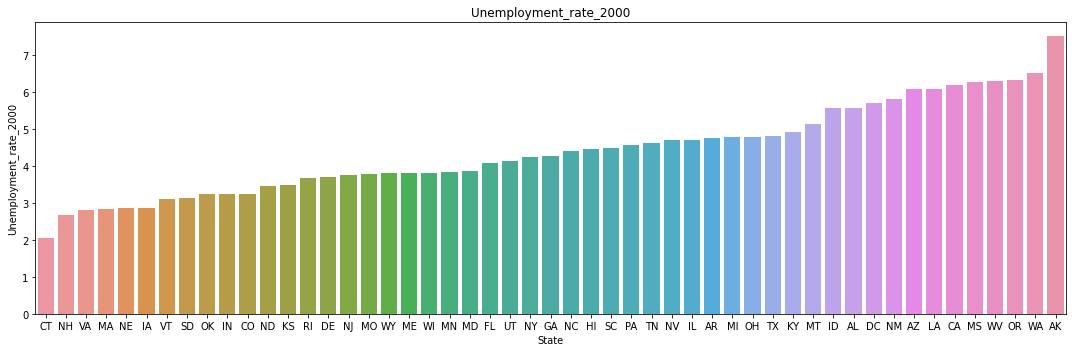

In [110]:
state_unem_barplot('Unemployment_rate_2000')

Avg Unemployment_rate_2015_to_2019:   5.018165480779195
Max Unemployment_rate_2015_to_2019:   6.3603980099502495
Min Unemployment_rate_2015_to_2019:   4.698223118737069


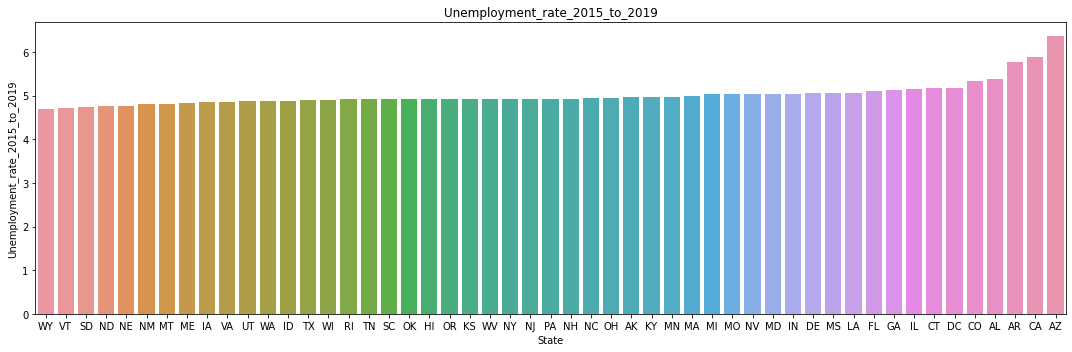

In [113]:
state_unem_barplot("Unemployment_rate_2015_to_2019")

In year 2000: The state with the highest unemployment rate is clearly Arkansas, where the state with the lowest unemployment rate is Connecticut. Unemployment rates spanned from about 2% to over 7%.

In years 2015-2019: The state with the highest unemployment rate is clearly Arizona (Arkansas being the 3rd highest rate). In this time period, we see most states having about the same unemployment rate, with a fairly flat trend until we observe CO, AL, AR, CA, and AZ with higher unemployment rates. Unemployment rates spanned from about 4.5% to over 6%.

Overall, the average unemployment rate of all states increased from 4.4% to about 5% from 2000 to 2015-2019, with more states having similar rates to one another in the 5% range in 2015-2019 time period.

Plot the the average unemployed population per state, for year 2000 and years 2015-2019. Then compare the two plots once more, looking for individual trends.

Avg Unemployed_2000:   2725.809188527328
Max Unemployed_2000:   17678.0
Min Unemployed_2000:   155.73846153846154


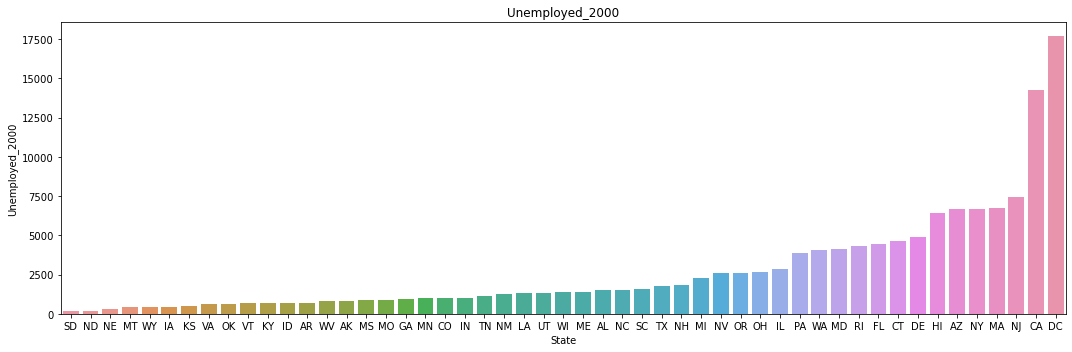

In [118]:
state_unem_barplot('Unemployed_2000')

Avg Unemployed_2015_to_2019:   5268.4492124687085
Max Unemployed_2015_to_2019:   9173.178404377944
Min Unemployed_2015_to_2019:   1527.4179104477612


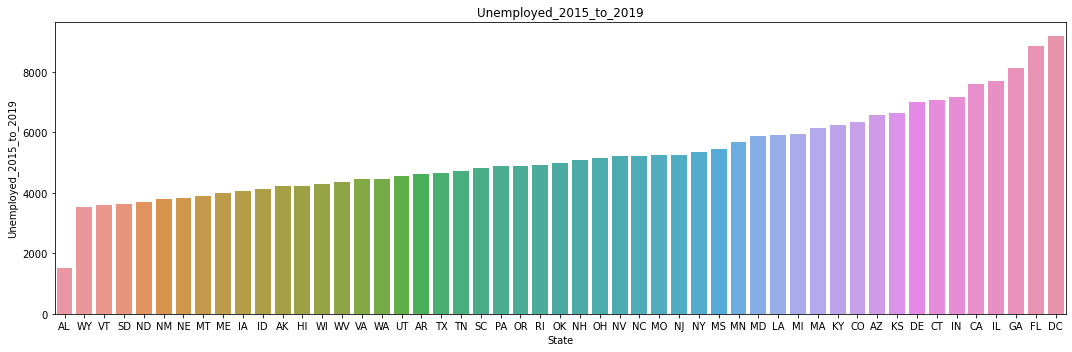

In [121]:
state_unem_barplot('Unemployed_2015_to_2019')

In year 2000: The state with the highest unemployed population is clearly Washington DC followed by California; whereas the state with the lowest unemployed population is South Dakota. Avg population of unemployed spanned from about 150 people to over 17,000 people. 

In years 2015-2019: The state with the highest unemployed population is Washington DC. The state with the lowest unemployed population is Alabama. Avg population of unemployed spanned from about 1,500 people to over 9,000 people. 

Overall, the average state unemployed population of all states increased from about 2,700 people per state to over 5,00 people per state from 2000 to 2015-2019, with more states having similar rates to one another in 2015-2019 time period. There is less variance from the mean in the time period 2015-2019 compared to 2000 as well. 

It seems there are more unemployed people by 2015-2019, and they are distributed more evenly to all the states since the year 2000.

### Statistical Summaries for Education

In [55]:
dff = pd.DataFrame({"State":data_clean['State'].unique(),
                  "Unemployed":state_avg_unemp_2000})
dff2 = pd.DataFrame({"State":data_clean['State'].unique(),
                  "Unemployed":state_avg_unemp_2015_to_2019})
dff.describe(), dff2.describe()

(         Unemployed
 count     51.000000
 mean    2725.809189
 std     3370.228671
 min      155.738462
 25%      756.889091
 50%     1401.458333
 75%     3946.199005
 max    17678.000000,
         Unemployed
 count    51.000000
 mean   5268.449212
 std    1473.411040
 min    1527.417910
 25%    4254.731746
 50%    4985.654955
 75%    6035.791471
 max    9173.178404)